### Importing required libraries


In [163]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
%matplotlib inline


In [164]:
# Read data
leads = pd.read_csv('Leads.csv')

In [165]:
# Understanding Data for EDA
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [166]:
 leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [167]:
leads.shape

(9240, 37)

In [168]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [169]:
# Data Cleaning Starts
## Checking null
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [170]:
# Percentage of NULL values
round(leads.isnull().sum().sort_values(ascending=False)/len(leads)*100, 2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [171]:
#Droppping features that have more than 40% NUll values
col_40_null = (leads.columns[(round(100*(leads.isnull().sum()/len(leads.index)), 2)) >= 40]).tolist()
col_40_null

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [172]:
leads = leads.drop(col_40_null,axis=1)

In [173]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [174]:
leads.shape

(9240, 32)

In [175]:
# Percentage of NULL values
round(leads.isnull().sum().sort_values(ascending=False)/len(leads)*100, 2)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

In [176]:
#Dropping Tags too as it holds no importance
leads.drop(['Tags'], axis = 1, inplace = True)

In [177]:
round(leads.isnull().sum().sort_values(ascending=False)/len(leads)*100, 2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [178]:
#City and Country too seems be of no use, so dropping them
leads.drop(['City'], axis = 1, inplace = True)

In [179]:
leads.drop(['Country'], axis = 1, inplace = True)

In [180]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.0000

In [181]:
leads.shape

(9240, 29)

In [182]:
#Now checking each column for checking "Select"
##Checking value counts 
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('..............................')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
..............................
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
..............................
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
..............................
Google               2868
Dir

In [183]:
# Select means user has not selected any options
## It is present in three columns- How did you hear about X Education,Lead Profile, and Specialization.
### Checking these columns individually

leads['How did you hear about X Education'].astype('category').value_counts()
#Select value seems too high

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [184]:
leads['Lead Profile'].astype('category').value_counts()
#Again Select value is very high here

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [34]:
leads['Specialization'].astype('category').value_counts()
#Select value comparetively less

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [185]:
#As the Select value is very high in 'Lead Profile' and 'How did you hear about X Education'. Dropping both
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [186]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [187]:
#checking What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts()

#it seems of no use so dropping

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [188]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [189]:
##Checking value counts for each column again
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('..............................')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
..............................
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
..............................
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
..............................
Google               2868
Dir

In [190]:
# Noticed following columns has max values as No:
## Search,Magazine,Newspaper Article,X Education Forums,Newspaper, Digital Advertisement,
## Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,
## I agree to pay the amount through cheque, and Do Not Call.

leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)


In [191]:
leads.isnull().sum()
#More clean with required important columns

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [192]:
#Handling Null values for What is your current occupation
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [45]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [193]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100
# Almost clean data

TotalVisits                               1.984733
Page Views Per Visit                      1.984733
Last Activity                             1.572519
Lead Source                               0.549618
Specialization                            0.274809
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [194]:
#Dropping Null from TotalVisits 
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [195]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100

Lead Source                               0.451713
Specialization                            0.280374
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [196]:
#Handling lead Source
leads = leads[~pd.isnull(leads['Lead Source'])]

In [197]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100

Specialization                            0.281646
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [198]:
#Drop NUll from Specialization
leads = leads[~pd.isnull(leads['Specialization'])]

In [199]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100
#All NUll values handled in Data

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [200]:
leads.shape

(6373, 14)

In [201]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6373 non-null   object 
 1   Lead Number                             6373 non-null   int64  
 2   Lead Origin                             6373 non-null   object 
 3   Lead Source                             6373 non-null   object 
 4   Do Not Email                            6373 non-null   object 
 5   Converted                               6373 non-null   int64  
 6   TotalVisits                             6373 non-null   float64
 7   Total Time Spent on Website             6373 non-null   int64  
 8   Page Views Per Visit                    6373 non-null   float64
 9   Last Activity                           6373 non-null   object 
 10  Specialization                          6373 non-null   obje

In [202]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [203]:
# Here Prospect ID and Lead Number are if no use so dropping them too
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [204]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [205]:
leads.shape

(6373, 12)

In [206]:
leads.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified
13,Landing Page Submission,Organic Search,No,0,5.0,170,5.00,Email Opened,Business Administration,Unemployed,Yes,Email Opened


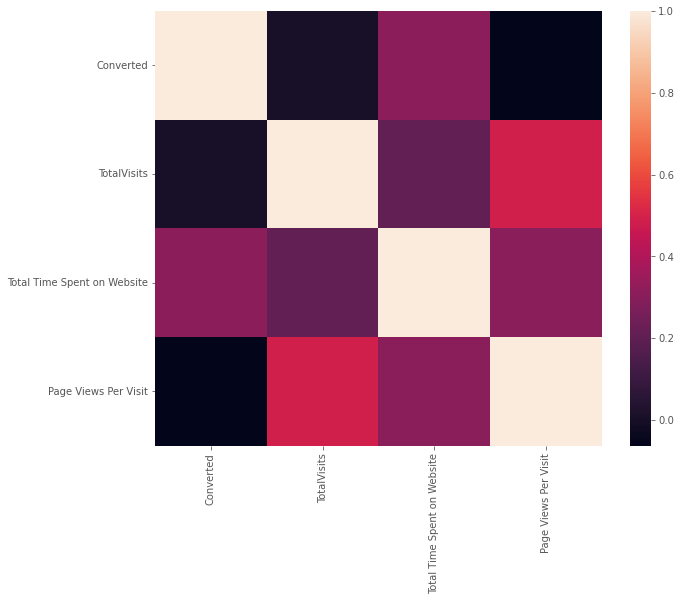

In [207]:
# Preparing the Data
# Checking Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(leads.corr())
plt.show()

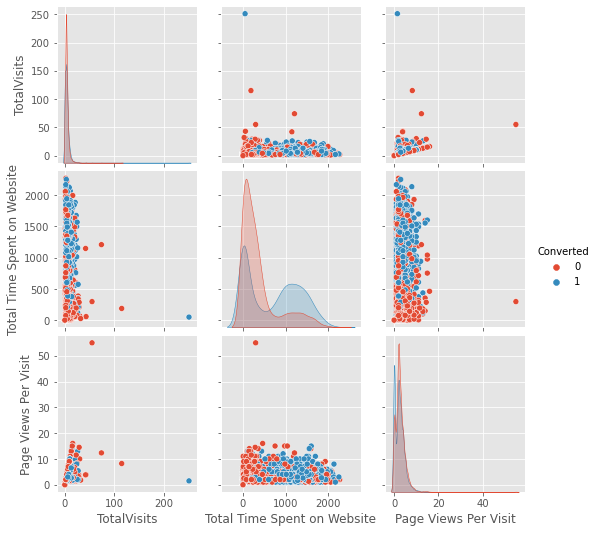

In [208]:
plot = leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
sns.pairplot(plot,diag_kind='kde',hue='Converted')
plt.show()

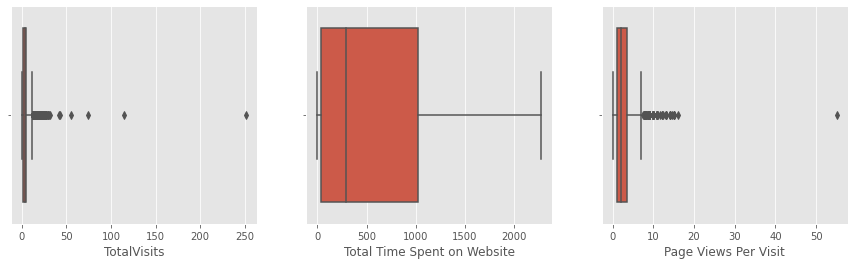

In [209]:
# Checking outliers
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=leads)

In [210]:
# We can see that there are outliers in "TotalVisits" and "Page Views Per Visit" columns.
# Removing Outliers from 10th and 90th percentile
col_outlier = ['TotalVisits','Page Views Per Visit']
for col in col_outlier: 
    q1 = leads[col].quantile(0.10)
    q3 = leads[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    leads = leads.loc[(leads[col] > range_low) & (leads[col] < range_high)]

In [211]:
leads.shape

(6313, 12)

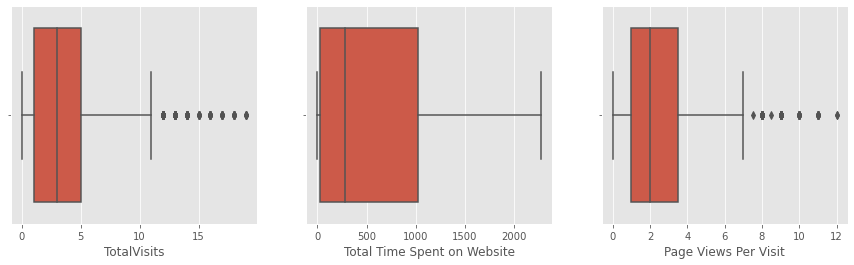

In [212]:
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=leads)

#Outliers handled

In [213]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. 

In [214]:
# Check the columns which are of type 'object'

catg = leads.loc[:, leads.dtypes == 'object']
catg.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [215]:
# Dummy variables creation
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)


In [216]:
# Adding results to the main df
leads = pd.concat([leads, dummy], axis=1)

In [217]:
# Separate dummy variable for 'Specialization' as it has the level 'Select' 
# Drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [218]:
# Drop the features for which the dummy variables have been created above

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [219]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [220]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6313 non-null   int64  
 1   TotalVisits                                           6313 non-null   float64
 2   Total Time Spent on Website                           6313 non-null   int64  
 3   Page Views Per Visit                                  6313 non-null   float64
 4   Lead Origin_Landing Page Submission                   6313 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6313 non-null   uint8  
 6   Lead Origin_Lead Import                               6313 non-null   uint8  
 7   Lead Source_Direct Traffic                            6313 non-null   uint8  
 8   Lead Source_Facebook                                  6313

### Test-Train Split



In [221]:
# Putting feature variables in X

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [222]:
# Put the target variable in y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [223]:
# Splitting the dataset into 70:30 train, test ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [224]:
scaler = StandardScaler()
# Sclaing only the numeric variables. We don't need to scale the binary variables :
X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4563,1.464097,-0.818534,2.815811,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5554,-0.463556,-0.811407,-0.225412,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8504,-0.463556,1.184212,-0.225412,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1888,0.821546,-0.392683,1.802070,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2276,-1.106107,-0.939696,-1.239153,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


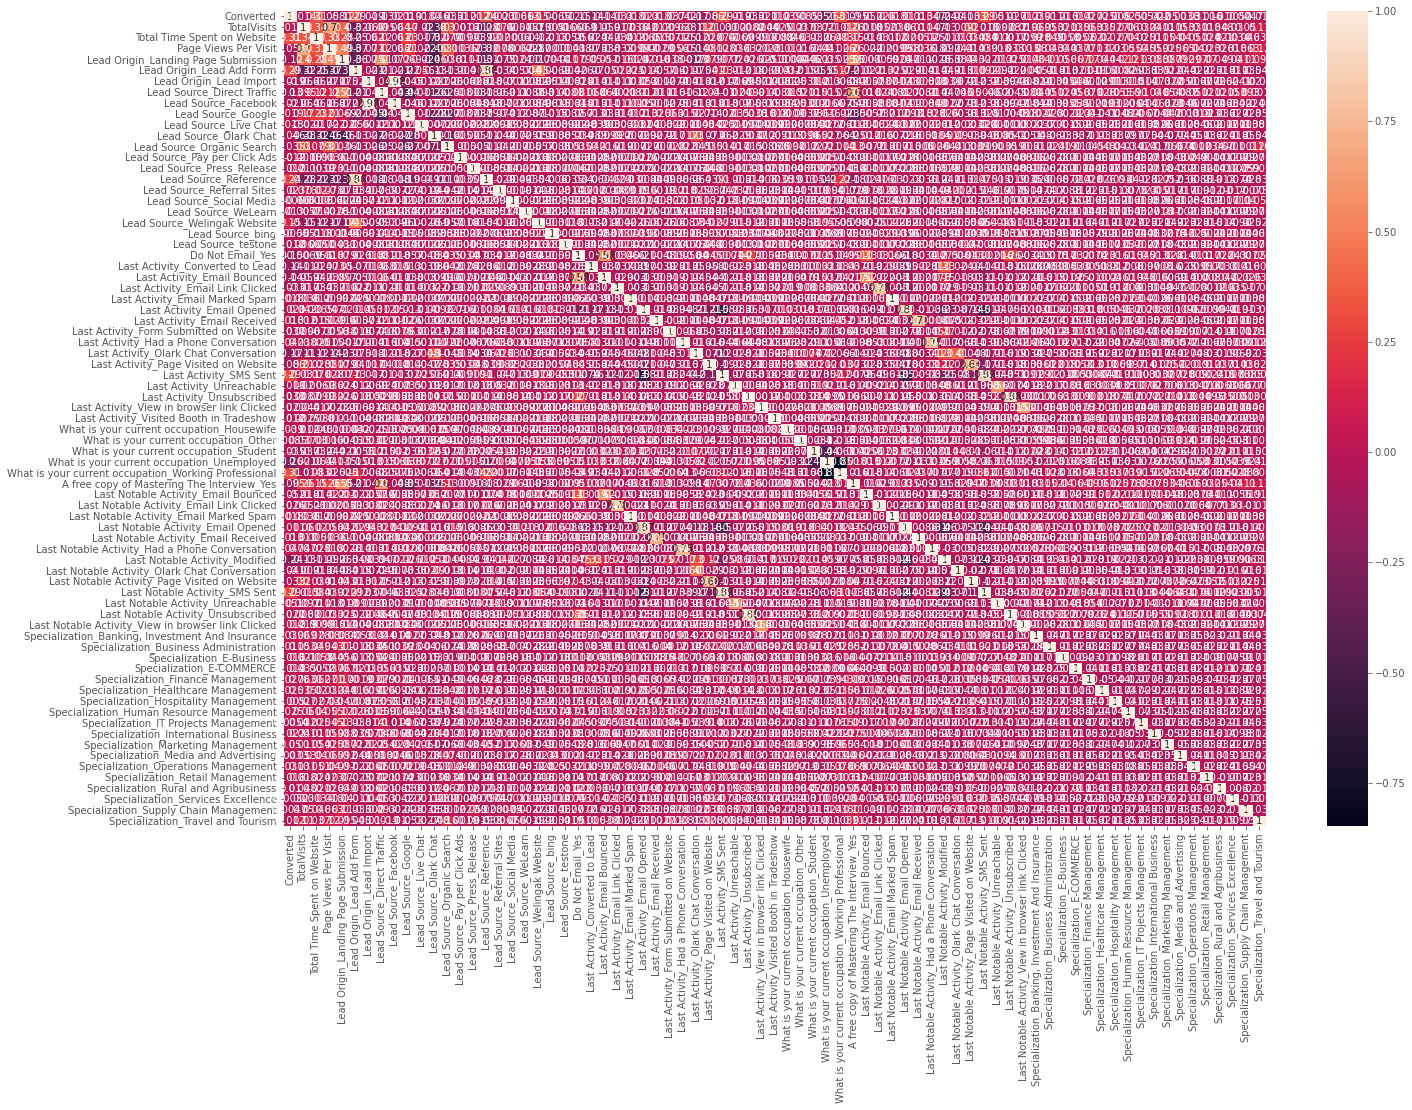

In [225]:
#Correlation
plt.figure(figsize=(22,15))
sns.heatmap(leads.corr(), annot=True)
plt.show()

In [229]:
leads.shape
X_train.shape
X_test.shape

(1894, 74)

### Model Building

In [230]:
# Creating Logistic Regresssion object
logrg = LogisticRegression()

In [231]:
# running RFE with 15 variables as output
rfe = RFE(logrg,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [232]:
# Features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 60),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 47),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_testone', False, 37),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Click

In [239]:
# Putting columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [240]:
X_train = X_train[col]

In [241]:
# Fitting logistic Regression Model on X_train
X_train_sm = sm.add_constant(X_train)
model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4403
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Sun, 16 Jul 2023   Deviance:                       4152.2
Time:                        10:33:34   Pearson chi2:                 4.55e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3591
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1760      0.553      3.932      0.000       1.091       3.261
Total Time Spent on Website                              1.1198      0.046     24.307      0.000       1.030       1.210
Lead Origin_Lead Add Form                                2.3770      0.250      9.511      0.000       1.887       2.867
Lead Source_Direct Traffic                              -1.7481      0.130    -13.478      0.000      -2.002      -1.494
Lead Source_Google                                      -1.3026      0.125    -10.448      0.000      -1.547      -1.058
Lead Source_Organic Search                              -1.5148      0.148    -10.218      0.000      -1.805      -1.224
Lead Source_Referral Sites                              -1.5774      0.387     -4.079      0.000      -2.335      -0.819
Lead Source_Welingak Website                            22.4420   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Do Not Email_Yes                                        -1.4255      0.189     -7.553      0.000      -1.795      -1.056
Last Activity_Converted to Lead                         -1.6905      0.250     -6.759      0.000      -2.181      -1.200
Last Activity_Olark Chat Conversation                   -1.7169      0.185     -9.299      0.000      -2.079      -1.355
What is your current occupation_Student                 -1.3597      0.584     -2.329      0.020      -2.504      -0.216
What is your current occupation_Unemployed              -1.2468      0.545     -2.289      0.022      -2.314      -0.179
What is your current occupation_Working Professional     1.3585      0.576      2.359      0.018       0.230       2.487
Last Notable Activity_Had a Phone Conversation          24.8061   3.62e+04      0.001      0.999   -7.09e+04    7.09e+04
Last Notable Activity_Unreachable                        2.8080      1.066      2.635      0.008       0.719       4.897
========================================================================================================================
"""

In [242]:
# Few varaibles have p-value>0.05, need to take care of them
# Checking vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,7.41
3,Lead Source_Google,3.86
2,Lead Source_Direct Traffic,3.56
4,Lead Source_Organic Search,2.15
1,Lead Origin_Lead Add Form,2.03
12,What is your current occupation_Working Profes...,1.81
6,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.28
10,What is your current occupation_Student,1.21
9,Last Activity_Olark Chat Conversation,1.18


In [243]:
#What is your current occupation_Unemployed has VIF>5, let's drop it
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [244]:
# Refit the model 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4404
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.9
Date:                Sun, 16 Jul 2023   Deviance:                       4157.8
Time:                        10:35:38   Pearson chi2:                 4.55e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3583
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9330      0.103      9.034      0.000       0.731       1.135
Total Time Spent on Website                              1.1206      0.046     24.333      0.000       1.030       1.211
Lead Origin_Lead Add Form                                2.3883      0.250      9.563      0.000       1.899       2.878
Lead Source_Direct Traffic                              -1.7406      0.130    -13.439      0.000      -1.994      -1.487
Lead Source_Google                                      -1.3039      0.125    -10.464      0.000      -1.548      -1.060
Lead Source_Organic Search                              -1.5059      0.148    -10.166      0.000      -1.796      -1.216
Lead Source_Referral Sites                              -1.5820      0.387     -4.092      0.000      -2.340      -0.824
Lead Source_Welingak Website                            22.4269   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Do Not Email_Yes                                        -1.4239      0.188     -7.571      0.000      -1.793      -1.055
Last Activity_Converted to Lead                         -1.6975      0.250     -6.789      0.000      -2.188      -1.207
Last Activity_Olark Chat Conversation                   -1.7055      0.184     -9.251      0.000      -2.067      -1.344
What is your current occupation_Student                 -0.1216      0.219     -0.555      0.579      -0.551       0.308
What is your current occupation_Working Professional     2.5978      0.196     13.229      0.000       2.213       2.983
Last Notable Activity_Had a Phone Conversation          24.7989   3.62e+04      0.001      0.999   -7.09e+04     7.1e+04
Last Notable Activity_Unreachable                        2.8046      1.066      2.632      0.008       0.716       4.893
========================================================================================================================
"""

In [245]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.49
6,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.18
11,What is your current occupation_Working Profes...,1.18
3,Lead Source_Google,1.15
2,Lead Source_Direct Traffic,1.14
7,Do Not Email_Yes,1.10
8,Last Activity_Converted to Lead,1.08
4,Lead Source_Organic Search,1.06
9,Last Activity_Olark Chat Conversation,1.06


In [246]:
#Drop Last Notable Activity_Had a Phone Conversation has it has high p-value
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [247]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4405
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.4
Date:                Sun, 16 Jul 2023   Deviance:                       4172.8
Time:                        10:37:29   Pearson chi2:                 4.56e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3561
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9311      0.103      9.019      0.000       0.729       1.133
Total Time Spent on Website                              1.1170      0.046     24.306      0.000       1.027       1.207
Lead Origin_Lead Add Form                                2.3878      0.250      9.561      0.000       1.898       2.877
Lead Source_Direct Traffic                              -1.7321      0.129    -13.392      0.000      -1.986      -1.479
Lead Source_Google                                      -1.2905      0.124    -10.374      0.000      -1.534      -1.047
Lead Source_Organic Search                              -1.4899      0.148    -10.084      0.000      -1.779      -1.200
Lead Source_Referral Sites                              -1.5778      0.386     -4.084      0.000      -2.335      -0.821
Lead Source_Welingak Website                            22.4276   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Do Not Email_Yes                                        -1.4306      0.188     -7.612      0.000      -1.799      -1.062
Last Activity_Converted to Lead                         -1.7047      0.250     -6.824      0.000      -2.194      -1.215
Last Activity_Olark Chat Conversation                   -1.7087      0.184     -9.273      0.000      -2.070      -1.348
What is your current occupation_Student                 -0.1268      0.219     -0.579      0.562      -0.556       0.302
What is your current occupation_Working Professional     2.5913      0.196     13.199      0.000       2.206       2.976
Last Notable Activity_Unreachable                        2.7949      1.066      2.623      0.009       0.706       4.883
========================================================================================================================
"""

In [248]:
# Drop Lead Source_Welingak Website
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [249]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4406
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.0
Date:                Sun, 16 Jul 2023   Deviance:                       4190.0
Time:                        10:38:16   Pearson chi2:                 4.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3536
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9297      0.103      9.012      0.000       0.728       1.132
Total Time Spent on Website                              1.1168      0.046     24.316      0.000       1.027       1.207
Lead Origin_Lead Add Form                                2.8080      0.247     11.365      0.000       2.324       3.292
Lead Source_Direct Traffic                              -1.7320      0.129    -13.398      0.000      -1.985      -1.479
Lead Source_Google                                      -1.2905      0.124    -10.378      0.000      -1.534      -1.047
Lead Source_Organic Search                              -1.4901      0.148    -10.092      0.000      -1.780      -1.201
Lead Source_Referral Sites                              -1.5773      0.386     -4.085      0.000      -2.334      -0.820
Do Not Email_Yes                                        -1.3887      0.183     -7.570      0.000      -1.748      -1.029
Last Activity_Converted to Lead                         -1.7012      0.250     -6.814      0.000      -2.190      -1.212
Last Activity_Olark Chat Conversation                   -1.7008      0.183     -9.270      0.000      -2.060      -1.341
What is your current occupation_Student                 -0.1397      0.220     -0.635      0.525      -0.571       0.292
What is your current occupation_Working Professional     2.5787      0.197     13.116      0.000       2.193       2.964
Last Notable Activity_Unreachable                        2.7936      1.066      2.621      0.009       0.704       4.883
========================================================================================================================
"""

In [250]:
#Drop What is your current occupation_Student
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [251]:
logmF = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmF.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4407
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.2
Date:                Sun, 16 Jul 2023   Deviance:                       4190.4
Time:                        10:39:06   Pearson chi2:                 4.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3535
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9233      0.103      8.994      0.000       0.722       1.124
Total Time Spent on Website                              1.1162      0.046     24.314      0.000       1.026       1.206
Lead Origin_Lead Add Form                                2.8084      0.247     11.366      0.000       2.324       3.293
Lead Source_Direct Traffic                              -1.7305      0.129    -13.391      0.000      -1.984      -1.477
Lead Source_Google                                      -1.2871      0.124    -10.361      0.000      -1.531      -1.044
Lead Source_Organic Search                              -1.4876      0.148    -10.076      0.000      -1.777      -1.198
Lead Source_Referral Sites                              -1.5701      0.386     -4.067      0.000      -2.327      -0.814
Do Not Email_Yes                                        -1.3863      0.183     -7.561      0.000      -1.746      -1.027
Last Activity_Converted to Lead                         -1.7008      0.250     -6.814      0.000      -2.190      -1.212
Last Activity_Olark Chat Conversation                   -1.7079      0.183     -9.324      0.000      -2.067      -1.349
What is your current occupation_Working Professional     2.5832      0.196     13.147      0.000       2.198       2.968
Last Notable Activity_Unreachable                        2.7963      1.066      2.624      0.009       0.707       4.885
========================================================================================================================
"""

In [252]:
# Refit the model with the new set of features

logmF = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logmF.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4407
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.2
Date:                Sun, 16 Jul 2023   Deviance:                       4190.4
Time:                        10:39:24   Pearson chi2:                 4.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3535
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9233      0.103      8.994      0.000       0.722       1.124
Total Time Spent on Website                              1.1162      0.046     24.314      0.000       1.026       1.206
Lead Origin_Lead Add Form                                2.8084      0.247     11.366      0.000       2.324       3.293
Lead Source_Direct Traffic                              -1.7305      0.129    -13.391      0.000      -1.984      -1.477
Lead Source_Google                                      -1.2871      0.124    -10.361      0.000      -1.531      -1.044
Lead Source_Organic Search                              -1.4876      0.148    -10.076      0.000      -1.777      -1.198
Lead Source_Referral Sites                              -1.5701      0.386     -4.067      0.000      -2.327      -0.814
Do Not Email_Yes                                        -1.3863      0.183     -7.561      0.000      -1.746      -1.027
Last Activity_Converted to Lead                         -1.7008      0.250     -6.814      0.000      -2.190      -1.212
Last Activity_Olark Chat Conversation                   -1.7079      0.183     -9.324      0.000      -2.067      -1.349
What is your current occupation_Working Professional     2.5832      0.196     13.147      0.000       2.198       2.968
Last Notable Activity_Unreachable                        2.7963      1.066      2.624      0.009       0.707       4.885
========================================================================================================================
"""

In [253]:
#ALl p-values handled, checking VIF again:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.18
1,Lead Origin_Lead Add Form,1.15
9,What is your current occupation_Working Profes...,1.15
3,Lead Source_Google,1.14
2,Lead Source_Direct Traffic,1.13
6,Do Not Email_Yes,1.10
7,Last Activity_Converted to Lead,1.08
4,Lead Source_Organic Search,1.06
8,Last Activity_Olark Chat Conversation,1.05
5,Lead Source_Referral Sites,1.01


In [255]:
#VIF and p-value handled in the features of the model. Now starting with Model Evaluation

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4563    0.217990
5554    0.186949
8504    0.904229
1888    0.309580
2276    0.468642
5687    0.936006
8886    0.762941
5085    0.171170
7587    0.223814
2912    0.468642
dtype: float64

In [256]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21798967, 0.18694894, 0.90422876, 0.30958003, 0.46864178,
       0.93600618, 0.76294142, 0.17117016, 0.22381448, 0.46864178])

In [257]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_model = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_model['CustID'] = y_train.index
y_train_pred_model.head()

,Converted,Conversion_Prob,CustID
0,0,0.217990,4563
1,0,0.186949,5554
2,0,0.904229,8504
3,0,0.309580,1888
4,0,0.468642,2276


### Finding optimal cutoff

In [259]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [260]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_model.Converted, y_train_pred_model.Conversion_Prob, drop_intermediate = False )

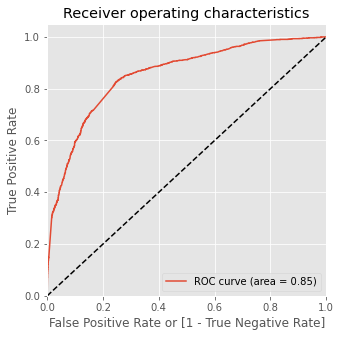

In [261]:
# Calling ROC function

draw_roc(y_train_pred_model.Converted, y_train_pred_model.Conversion_Prob)
#The area under the curve of the ROC is 0.85 which is quite good and represents a good model

In [262]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_model[i]= y_train_pred_model.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_model.head()

,Converted,Conversion_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.217990,4563,1,1,1,0,0,0,0,0,0,0
1,0,0.186949,5554,1,1,0,0,0,0,0,0,0,0
2,0,0.904229,8504,1,1,1,1,1,1,1,1,1,1
3,0,0.309580,1888,1,1,1,1,0,0,0,0,0,0
4,0,0.468642,2276,1,1,1,1,1,0,0,0,0,0


In [263]:
# Creating a dataframe to check accuracy, sensitivity, and specificity at different values of probability

cutoff_df = pd.DataFrame( columns = ['prob','accur','sens','spec'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model[i] )
    total1=sum(sum(cm1))
    accur = (cm1[0,0]+cm1[1,1])/total1
    
    spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sens = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accur,sens,spec]
print(cutoff_df)

     prob     accur      sens      spec
0.0   0.0  0.478841  1.000000  0.000000
0.1   0.1  0.556687  0.990548  0.158055
0.2   0.2  0.656710  0.940454  0.396005
0.3   0.3  0.759674  0.872401  0.656101
0.4   0.4  0.786151  0.836011  0.740339
0.5   0.5  0.778004  0.701323  0.848459
0.6   0.6  0.760353  0.629490  0.880591
0.7   0.7  0.735234  0.536389  0.917933
0.8   0.8  0.694048  0.411153  0.953973
0.9   0.9  0.658067  0.304348  0.983066


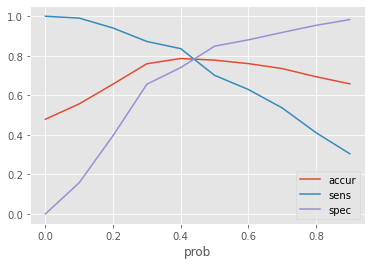

In [264]:
# Plotting

cutoff_df.plot.line(x='prob', y=['accur','sens','spec'])
plt.show()
# #The optimal value  for cutoff is 0.42

In [265]:
# Creating a column with name "predicted", which is the predicted value for 0.42 cutoff 
y_train_pred_model['predicted'] = y_train_pred_model.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_model.head()

,Converted,Conversion_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.217990,4563,1,1,1,0,0,0,0,0,0,0,0
1,0,0.186949,5554,1,1,0,0,0,0,0,0,0,0,0
2,0,0.904229,8504,1,1,1,1,1,1,1,1,1,1,1
3,0,0.309580,1888,1,1,1,1,0,0,0,0,0,0,0
4,0,0.468642,2276,1,1,1,1,1,0,0,0,0,0,1


### Creating Lead Score
Creating a column called Lead Score by multplying the converted probablity with 100.

In [266]:
# Creating Lead Score column
y_train_pred_model['Lead Score'] = round((y_train_pred_model['Conversion_Prob']*100))
y_train_pred_model.head()

#The customers with Lead Score more than 42.0 will be converted as we decided to have the optimal probablity cutoff is 0.42.

,Converted,Conversion_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.217990,4563,1,1,1,0,0,0,0,0,0,0,0,22.0
1,0,0.186949,5554,1,1,0,0,0,0,0,0,0,0,0,19.0
2,0,0.904229,8504,1,1,1,1,1,1,1,1,1,1,1,90.0
3,0,0.309580,1888,1,1,1,1,0,0,0,0,0,0,0,31.0
4,0,0.468642,2276,1,1,1,1,1,0,0,0,0,0,1,47.0


In [267]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_model[y_train_pred_model['predicted']==1]
y_train_pred_converted.head()

,Converted,Conversion_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
2,0,0.904229,8504,1,1,1,1,1,1,1,1,1,1,1,90.0
4,0,0.468642,2276,1,1,1,1,1,0,0,0,0,0,1,47.0
5,1,0.936006,5687,1,1,1,1,1,1,1,1,1,1,1,94.0
6,1,0.762941,8886,1,1,1,1,1,1,1,1,0,0,1,76.0
9,1,0.468642,2912,1,1,1,1,1,0,0,0,0,0,1,47.0


In [268]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted
# The average Lead Score of the customers, who were converted is 73.

73

In [270]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_model[y_train_pred_model['predicted']==0]
y_train_pred_not_converted.head()

,Converted,Conversion_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.217990,4563,1,1,1,0,0,0,0,0,0,0,0,22.0
1,0,0.186949,5554,1,1,0,0,0,0,0,0,0,0,0,19.0
3,0,0.309580,1888,1,1,1,1,0,0,0,0,0,0,0,31.0
7,0,0.171170,5085,1,1,0,0,0,0,0,0,0,0,0,17.0
8,0,0.223814,7587,1,1,1,0,0,0,0,0,0,0,0,22.0


In [271]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

20

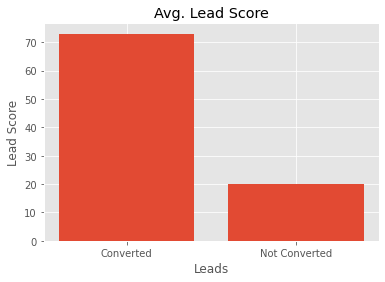

In [272]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()

### Confusion Matrix and Accuracy

In [273]:
confusion = metrics.confusion_matrix(y_train_pred_model['Converted'], y_train_pred_model['predicted'])
print(confusion)

[[1726  577]
 [ 363 1753]]


In [274]:
# Accuracy
metrics.accuracy_score(y_train_pred_model['Converted'], y_train_pred_model['predicted'])

0.7872821905408464

In [275]:
#TP = confusion[1,1] # true positive 
#TN = confusion[0,0] # true negatives
#FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives

In [276]:
# Sensitivity
TP / float(TP+FN)

0.8360113421550095

In [277]:
# Specificity
TN / float(TN+FP)
# Model has Accuracy - 78%, Sensitivity- 83%, and Specificity- 74% (Good Model)

0.7403386886669562

In [308]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model.predicted )
confusion
y_train_pred_model.Converted, y_train_pred_model.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4414    1
 4415    1
 4416    0
 4417    1
 4418    1
 Name: Converted, Length: 4419, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 4414    1
 4415    1
 4416    0
 4417    1
 4418    1
 Name: predicted, Length: 4419, dtype: int64)

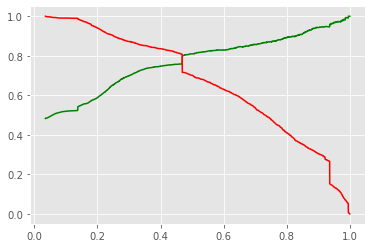

In [310]:
p, r, thresholds = precision_recall_curve(y_train_pred_model.Converted, y_train_pred_model.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
# Testing the model
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
# Taking only the columns, which are selected in the train set
X_test = X_test[col]
X_test.head()

# Add constant
X_test_sm = sm.add_constant(X_test)

In [ ]:
# Predictions on the test set with the final model res
y_test_pred = res.predict(sm.add_constant(X_test))

In [301]:
y_test.pred(10)

1474    0
725     1
7771    0
5961    1
6736    1
703     0
6711    1
9192    1
8657    0
7455    1
Name: Converted, dtype: int64

In [ ]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [ ]:
y_pred_final['test_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['test_predicted'])
confusion2

In [ ]:
# Accuracy of the test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['test_predicted'])

In [318]:
# Sensitivity
TP / float(TP+FN)

0.8360113421550095

In [317]:
# Specificity
TN / float(TN+FP)

0.7403386886669562

In [ ]:
### Analysis
# There are a lot of leads generated in the initial stage but only a few of them come out as converted customers. In the middle stage, we need to put effort to convert the potential leads well (i.e. telling the leads about the product, constant communication etc.).
# Look for the best prospects from the leads generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.
# Monitor each lead carefully and inform them about courses, services, job offers and future higher studies features.
# Have further inquiries and appointments with the leads to determine their intention to join online courses.
